In [1]:
import json
import logging
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import interpolate

C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [2]:
from config import get_config
from equation2 import get_equation
from solverVer2 import FeedForwardModel

In [3]:
def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price

In [4]:
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()    
    keys_list = [keys for keys in flags_dict]    
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)

FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_string('f', '', 'kernel')

tf.app.flags.DEFINE_string('problem_name', 'EuropeanCall',
                           """The name of partial differential equation.""")
tf.app.flags.DEFINE_integer('num_run', 1,
                            """The number of experiments to repeatedly run for the same problem.""")
tf.app.flags.DEFINE_string('log_dir', './logs',
                           """Directory where to write event logs and output array.""")

In [5]:
weight={}
problem_name = FLAGS.problem_name
config = get_config(problem_name)
bsde = get_equation(problem_name, config.dim, config.total_time, config.num_time_interval)

if not os.path.exists(FLAGS.log_dir):
    os.mkdir(FLAGS.log_dir)
path_prefix = os.path.join(FLAGS.log_dir, problem_name)
with open('{}_config.json'.format(path_prefix), 'w') as outfile:
    json.dump(dict((name, getattr(config, name))
                    for name in dir(config) if not name.startswith('__')),
                outfile, indent=2)
logging.basicConfig(level=logging.INFO,
                    format='%(levelname)-6s %(message)s')

for idx_run in range(1, FLAGS.num_run+1):
    tf.reset_default_graph()
    with tf.Session() as sess:
        logging.info('Begin to solve %s with run %d' % (problem_name, idx_run))
        model = FeedForwardModel(config, bsde, sess)
        model.build()
        training_history, graphs = model.train()
        #for i in tf.trainable_variables():
            #temp=i.name.split('/')
            #print(temp)
            #if len(temp)>1:
                #if temp[1]=='f_layer':
                    #weight[i.name]=sess.run(i)
        #    print(i.name)
        #    print(sess.run(i))
        #   print('\n')
g=graphs

INFO   Begin to solve EuropeanCall with run 1


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:62: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:66: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:124: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:161: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.



t: 0
t: 1
t: 2
t: 3
t: 4
t: 5
t: 6
t: 7
t: 8
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:103: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:109: The name tf.train.piecewise_constant is deprecated. Please use tf.compat.v1.train.piecewise_constant instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:112: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:116: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

INFO   step:     0,    loss: 2.7851e+02,  elapsed time  14
INFO   step:     0,  training  loss: 3.3918e+02
INFO   step:  1000,    loss: 2.5707e+02,  elapsed time  18
INFO   step:  1000,  training  loss: 3.2057e+02
INFO   step:  2000,    loss: 2.5262e+02,  elapsed time  20
INFO   step:  2000,  training  loss: 2.9456e+02
INFO   step:  3000,    loss: 2.5236e+02,  elapsed time  22
INFO   step:  3000,  training  loss: 2.9882e+02
INFO   step:  4000,    loss: 2.5236e+02,  elapsed time  24
INFO   step:  4000,  training  loss: 2.8364e+02
INFO   step:  5000,    loss: 2.5267e+02,  elapsed time  27
INFO   step:  5000,  training  loss: 2.9107e+02
INFO   step:  6000,    loss: 2.5249e+02,  elapsed time  29
INFO   step:  6000,  training  loss: 2.7978e+02
INFO   step:  7000,    loss: 2.5249e+02,  elapsed ti

INFO   step: 75000,    loss: 2.5359e+02,  elapsed time 189
INFO   step: 75000,  training  loss: 3.0507e+02
INFO   step: 76000,    loss: 2.5244e+02,  elapsed time 192
INFO   step: 76000,  training  loss: 3.4266e+02
INFO   step: 77000,    loss: 2.5313e+02,  elapsed time 195
INFO   step: 77000,  training  loss: 3.0796e+02
INFO   step: 78000,    loss: 2.5236e+02,  elapsed time 197
INFO   step: 78000,  training  loss: 2.6689e+02
INFO   step: 79000,    loss: 2.5340e+02,  elapsed time 200
INFO   step: 79000,  training  loss: 2.8689e+02
INFO   step: 80000,    loss: 2.5292e+02,  elapsed time 203
INFO   step: 80000,  training  loss: 2.4507e+02
INFO   step: 81000,    loss: 2.5235e+02,  elapsed time 206
INFO   step: 81000,  training  loss: 3.1223e+02
INFO   step: 82000,    loss: 2.5308e+02,  elapsed time 209
INFO   step: 82000,  training  loss: 2.6763e+02
INFO   step: 83000,    loss: 2.5441e+02,  elapsed time 211
INFO   step: 83000,  training  loss: 2.8269e+02
INFO   step: 84000,    loss: 2.5237e+

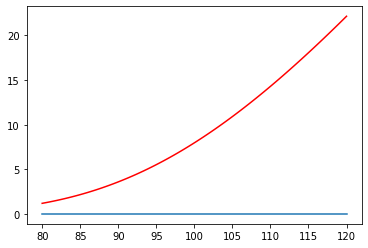

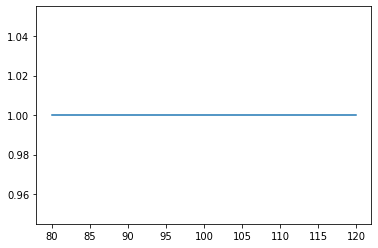

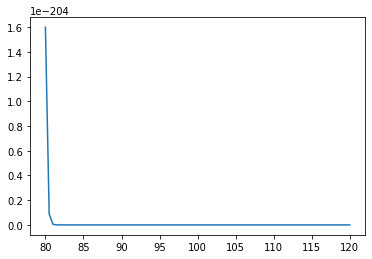

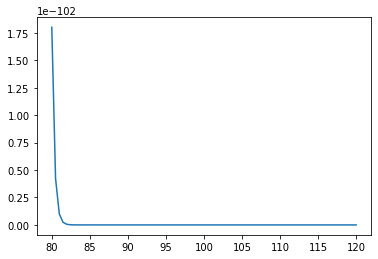

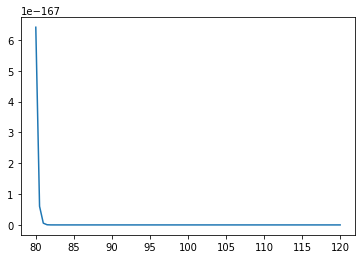

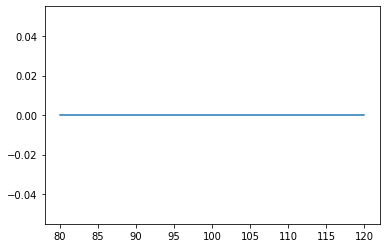

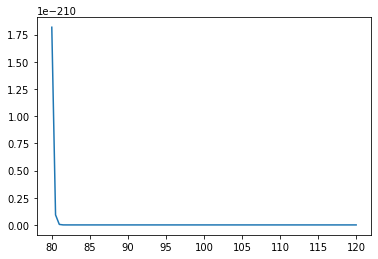

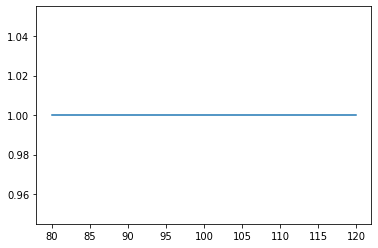

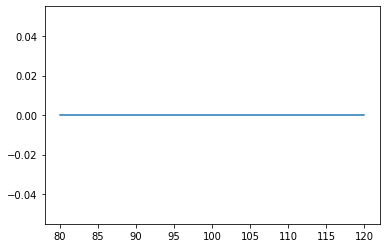

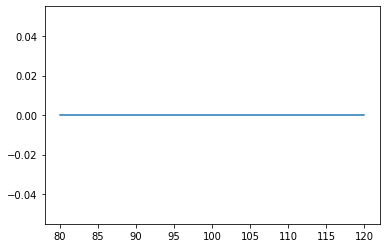

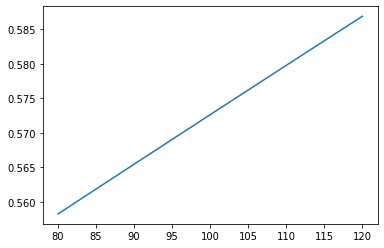

In [6]:
s0=100
k=100
r=0.00
sigma=0.20
T=1

for i in range(len(g)):
    fig, ax = plt.subplots()
    ax.plot(np.linspace(80,120, 82),np.array(g[i]).flatten())
    if i==0:
        ax.plot(np.linspace(80,120, 82),blackscholes_price(k, T, np.linspace(80,120, 82), sigma, r, 0, 'call'),'r',label='Black-Scholes Price')

In [7]:
g[0]

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([

In [8]:
_dim=1
num_sample=10
_sigma=0.2
_num_time_interval=10
_x_init=80+40*np.random.uniform(0,1,[num_sample,_dim])
dw_sample = np.random.randn(num_sample,
                                     _dim,
                                     _num_time_interval) * 0.1
x_sample = np.zeros([num_sample, _dim, _num_time_interval + 1])
x_sample[:, :, 0] = np.ones([num_sample,_dim]) * _x_init

factor = np.exp((-(_sigma**2)/2)*0.1)
for i in range(_num_time_interval):
    x_sample[:, :, i + 1] = (factor * np.exp(_sigma * dw_sample[:, :, i])) * x_sample[:, :, i]
x_sample

array([[[ 80.92891591,  82.43384615,  83.03515284,  80.79825734,
          79.48075481,  79.78595421,  79.45381261,  75.54405554,
          77.12384918,  76.53541667,  73.81892775]],

       [[106.89686121, 107.95615649, 107.97827791, 107.70490614,
         109.20950186, 107.59158002, 104.11404183, 104.39921003,
         103.83403682, 103.70291612, 102.71850255]],

       [[107.67514133, 107.01249228, 102.94869856, 103.44964551,
         104.9655019 , 102.55339103,  99.76651049,  95.13440188,
          95.50876413,  95.13111956,  96.01709604]],

       [[ 95.40934729,  96.16533837,  96.46272466,  96.92919127,
          97.99369447,  97.15440761,  93.67272886,  93.96191941,
          91.91362271,  91.04558158,  89.55593516]],

       [[114.59924227, 115.52847406, 119.21229847, 114.5640195 ,
         114.63289989, 115.1198274 , 112.92288548, 111.26898072,
         111.66974598, 113.78108368, 114.10695206]],

       [[110.04378154, 109.71018798, 112.91239534, 113.27339557,
         116.64